In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
thyroid_data = pd.read_csv('D:\Download\Thyroid Cancer Prediction\Thyroid_Diff.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\abirami\AppData\Local\Temp\ipykernel_13896\867114138.py:1: SyntaxWarning: invalid escape sequence '\D'
  thyroid_data = pd.read_csv('D:\Download\Thyroid Cancer Prediction\Thyroid_Diff.csv')


In [11]:
thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [12]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [13]:
thyroid_data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [14]:
thyroid_data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

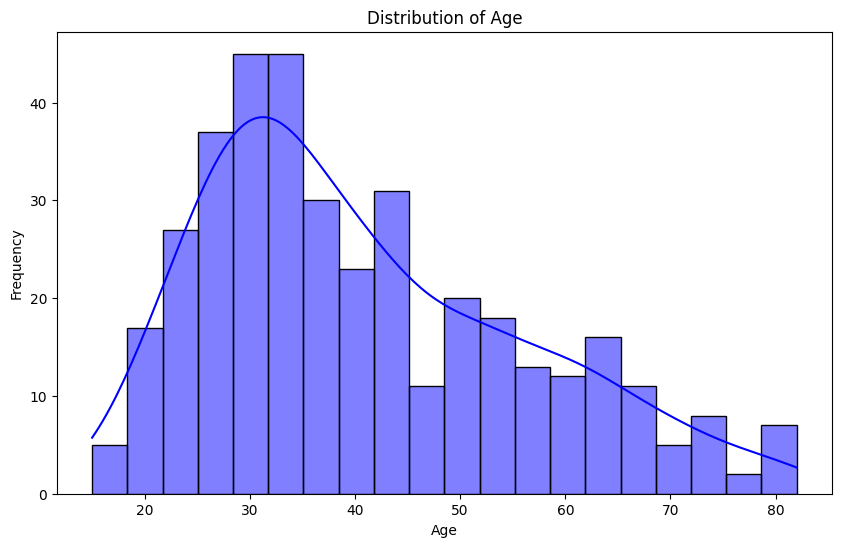

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(thyroid_data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

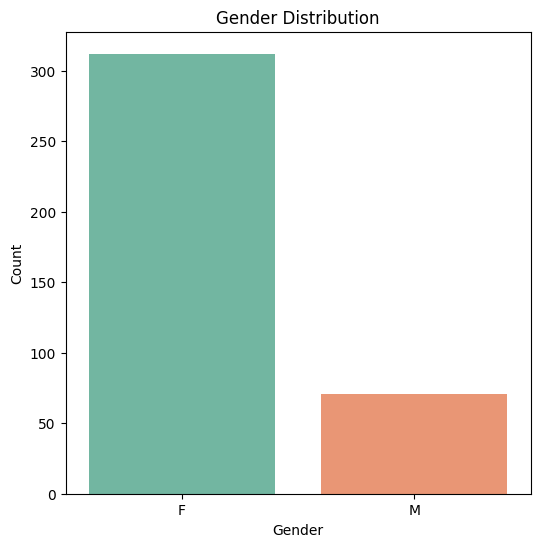

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(data=thyroid_data, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

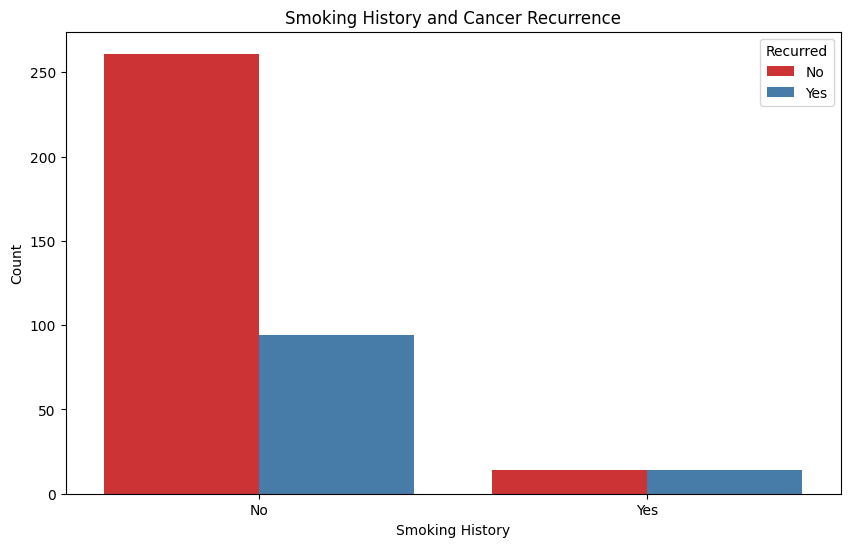

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=thyroid_data, x='Hx Smoking', hue='Recurred', palette='Set1')
plt.title('Smoking History and Cancer Recurrence')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

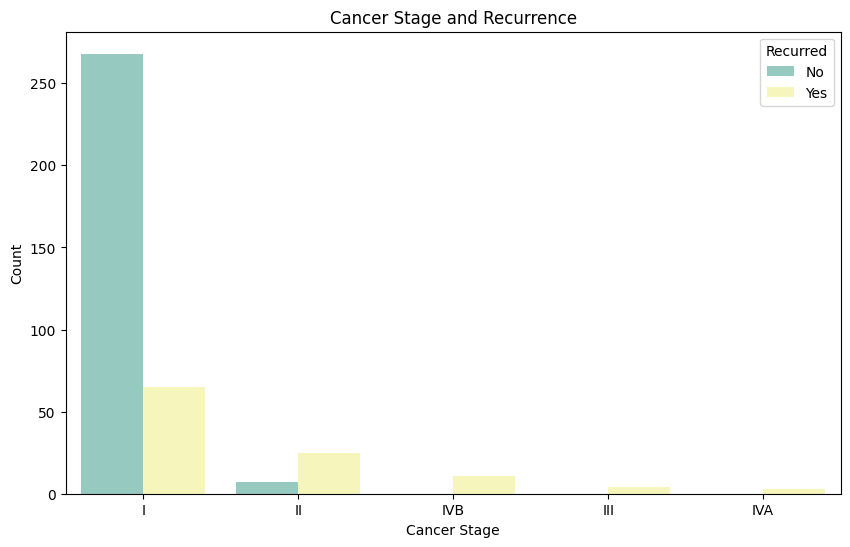

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=thyroid_data, x='Stage', hue='Recurred', palette='Set3')
plt.title('Cancer Stage and Recurrence')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()

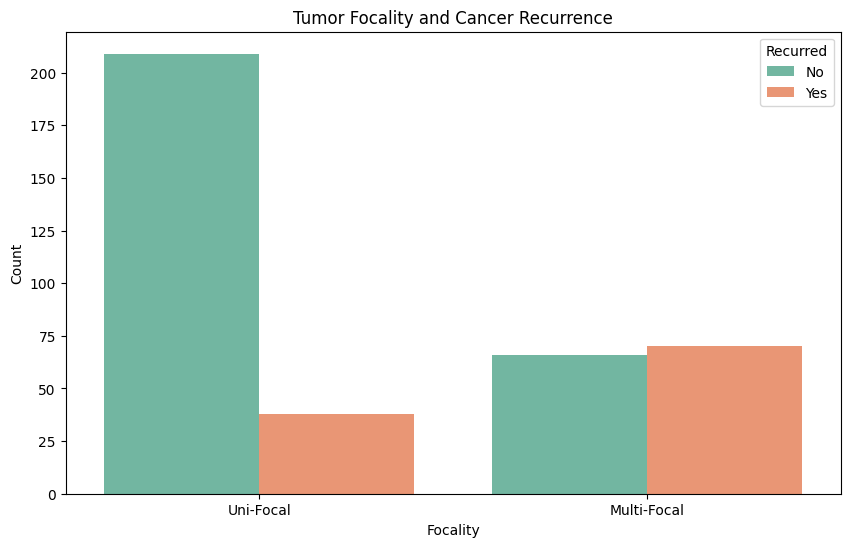

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=thyroid_data, x='Focality', hue='Recurred', palette='Set2')
plt.title('Tumor Focality and Cancer Recurrence')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.show()

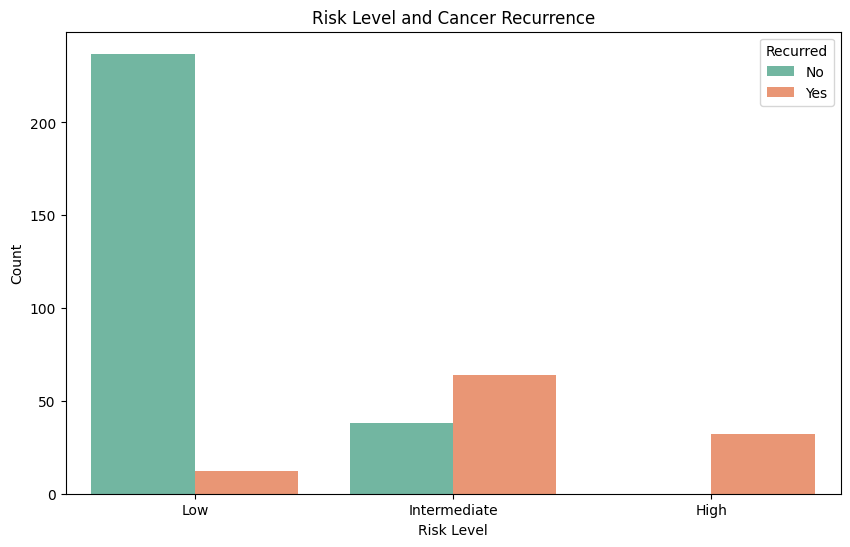

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=thyroid_data, x='Risk', hue='Recurred', palette='Set2')
plt.title('Risk Level and Cancer Recurrence')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

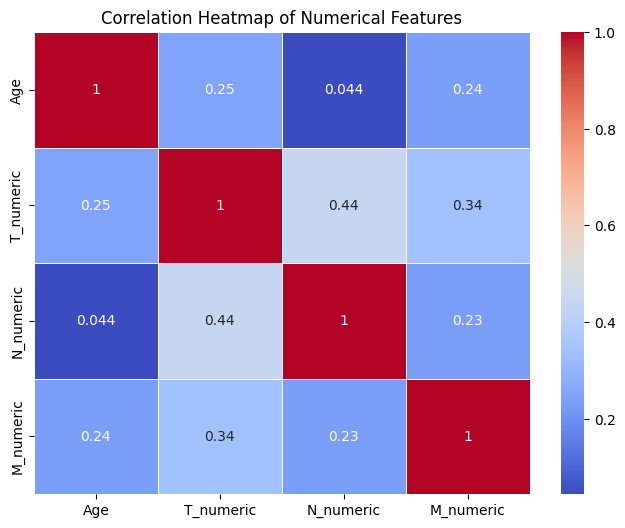

In [ ]:
thyroid_data['T'] = thyroid_data['T'].astype(str)
thyroid_data['N'] = thyroid_data['N'].astype(str)
thyroid_data['M'] = thyroid_data['M'].astype(str)

thyroid_data['T_numeric'] = thyroid_data['T'].str.extract(r'(\d+)').astype(float)
thyroid_data['N_numeric'] = thyroid_data['N'].str.extract(r'(\d+)').astype(float)
thyroid_data['M_numeric'] = thyroid_data['M'].str.extract(r'(\d+)').astype(float)

numerical_data = thyroid_data[['Age', 'T_numeric', 'N_numeric', 'M_numeric']]

corr_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

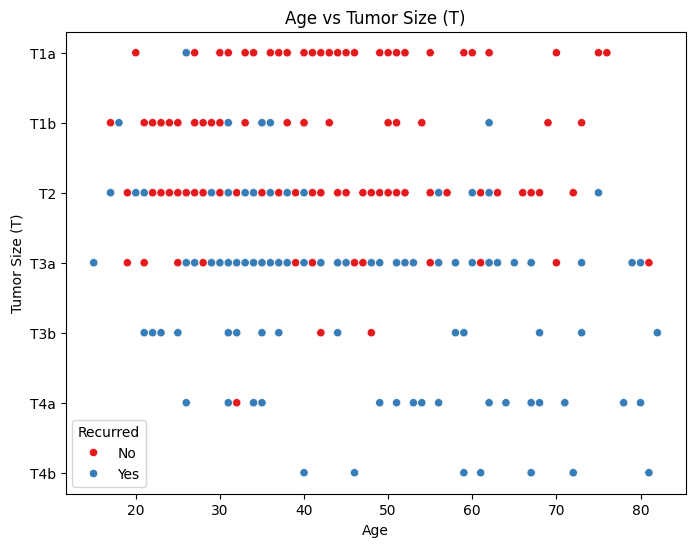

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='T', data=thyroid_data, hue='Recurred', palette='Set1')
plt.title('Age vs Tumor Size (T)')
plt.xlabel('Age')
plt.ylabel('Tumor Size (T)')
plt.show()

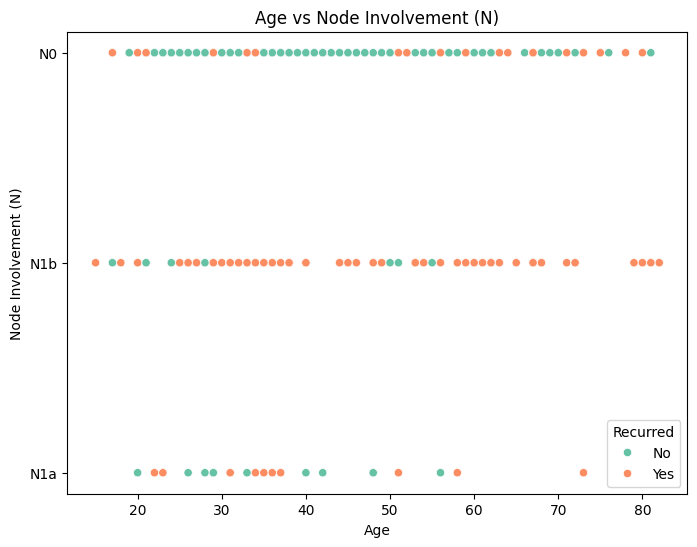

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='N', data=thyroid_data, hue='Recurred', palette='Set2')
plt.title('Age vs Node Involvement (N)')
plt.xlabel('Age')
plt.ylabel('Node Involvement (N)')
plt.show()


#This graph is a scatter plot that visualizes the relationship between age and tumor size (T) for two groups: those with tumor recurrence (Yes) and those without recurrence (No)**. Here’s what can be inferred:
Tumor Size Categories: The y-axis represents the tumor size (T) categories, labeled T1a, T1b, T2, T3a, T3b, T4a, and T4b. These correspond to the stages of tumor size, where higher categories (e.g., T4b) represent larger or more advanced tumors.

Age Range: The x-axis shows the age of the individuals, ranging from about 20 to 80 years old.

Recurrence vs Non-recurrence:

Red dots represent patients whose tumors did not recur.
Blue dots represent patients whose tumors did recur.
Distribution of Recurrence:

For smaller tumors (T1a, T1b, and T2), there seems to be a mix of both red (No) and blue (Yes) points across different age groups, indicating that both recurrence and non-recurrence occurred somewhat evenly for smaller tumors.
In larger tumors (T3b, T4a, T4b), blue dots (recurrence) are more common, particularly for older individuals (ages 40 and above). This suggests that recurrence is more likely in patients with larger tumors.
Age-related Trends:

Recurrence (blue dots) appears to be more frequent in individuals aged 40 and older, particularly for larger tumor sizes (T3a and above).
For younger individuals (below 40), recurrence seems less frequent, though there are still instances of both recurrence and non-recurrence across different tumor sizes.
Key Insight: Larger tumors (T3b and above) seem to correlate more with recurrence (blue), and this trend is more pronounced in older individuals. For smaller tumors, recurrence happens but less frequently and appears to be more evenly distributed across different age groups.

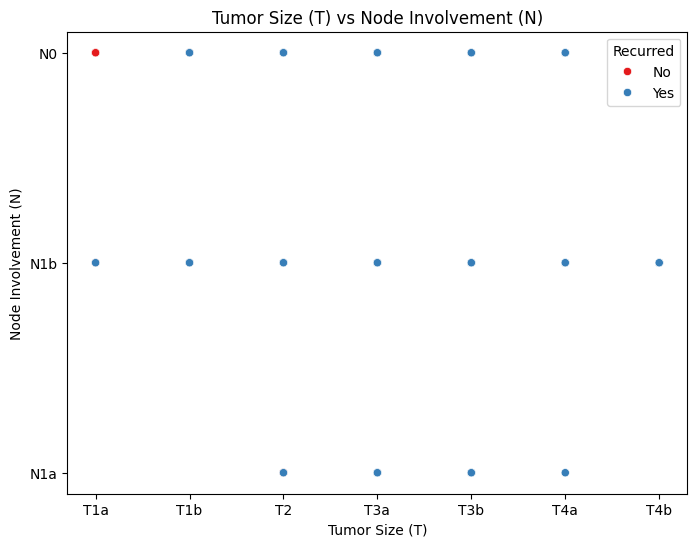

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='T', y='N', data=thyroid_data, hue='Recurred', palette='Set1')
plt.title('Tumor Size (T) vs Node Involvement (N)')
plt.xlabel('Tumor Size (T)')
plt.ylabel('Node Involvement (N)')
plt.show()